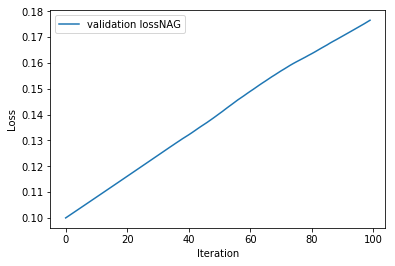

In [2]:
from sklearn import datasets as ds
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt


def Loss(x_train,y_train,w,C,b):
    ls=0
    i=0
    for x_sample, y_sample in zip(x_train,y_train):
        temp = np.ones((n_sample,1)) - y_sample * np.dot(x_sample,w)
        if(0<temp[i,0]):
            ls+=temp[i,0]
        else:
            ls+=0
        i+=1
    loss=np.dot(w.T,w)/2+C*ls
    return loss

def Gradw(x_train,y_train,w,C,b):
    g=0
    i=0
    for x_sample, y_sample in zip(x_train,y_train):
        temp = np.ones((n_sample,1)) - y_sample * np.dot(x_sample,w)
        if(temp[i,0]>0):
            gw=-y_sample*x_sample
        else:
            gw=0
        g+=gw
        i+=1
    gradw=w+C*g
    return gradw

def Gradb(x_train,y_train,w,C,b):
    g1=0
    i=0
    for x_sample, y_sample in zip(x_train,y_train):
        temp = np.ones((n_sample,1)) - y_sample * np.dot(x_sample,w)
        if(temp[i,0]>0):
            gb=-y_sample
        else:
            gb=0
        g1+=gb
        i+=1
    gradb=C*g1
    return gradb

def NAG(x_train,y_train,w,lmd,v,h):  
    g=Grad(x_train,y_train,w,lmd)
    v=lmd*v+h*g
    w=w-v
    return w
    
def RMSProp(x_train,y_train,w,lmd,e,h,G):
    g=Grad(x_train,y_train,w,lmd)
    G=lmd*G+np.dpt(1-lmd,np.dot(g,g))
    w=w-np.dot(h/np.sqrt(G+e),g)
    return w

def AdaDelta(x_train,y_train,w,lmd,e,dt,G):
    g=Grad(x_t,y_t,w,lmd)
    G=lmd*G+np.dpt(1-lmd,np.dot(g,g))
    dw=-np.dot(np.sqrt(dt+e)/np.sqrt(G+e),g)
    w=w+dw
    dt=lmd*dt+np.dot(1-lmd,np.dot(dw,dw))
    return w

def Adam(x_train,y_train,w,lmd,b,m,e,h,G):
    g=Grad(x_t,y_t,w,lmd)
    m=b*m+(1-b)*g
    G=lmd*G+np.dpt(1-lmd,np.dot(g,g))
    a1=h*(np.sqrt(1-lmd)/(1-b))
    lmd*=lmd
    b*=b
    w=w-a1*(m/np.sqrt(G+e))
    return w

def iteration(x_train,x_validation,y_train,y_validation,w,C,b):
    itera = 100
    lr = 0.001
    train_loss=[]
    validation_loss=[]
    for i in range(itera):
        loss_t=Loss(x_train,y_train,w,C,b)
        tx,ty=x_train.shape
        lt=loss_t[0,0]/tx
        train_loss.append(lt)
        loss_v=Loss(x_validation,y_validation,w,C,b)
        vx,vy=x_validation.shape
        lv=loss_v[0,0]/vx
        validation_loss.append(lv)
        w=w-lr*Gradw(x_train,y_train,w,C,b)
        b=b-lr*Gradb(x_train,y_train,w,C,b)
    return w,b,train_loss,validation_loss
        
if __name__ == '__main__':
    C=0.1
    x_train, y_train = ds.load_svmlight_file('E:/test/2.txt')
    x_train = x_train.toarray()
    yl=len(y_train)
    y_train=y_train.reshape(yl,1)
    n_sample,n_feature=x_train.shape
    x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=1)
    n_sample,n_feature=x_train.shape
    w0=np.zeros(shape=(n_feature,1))
    b=0
    w,b,train_lossNAG,validation_lossNAG=iteration(x_train, x_validation, y_train, y_validation,w0,C,b)
    plt.plot(validation_lossNAG, label='validation lossNAG')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    